# OmniCal Metrics Example Notebook

How to run and use omnical metrics.

There are currently three main metrics:

1.
Average Chi Square per antenna given by Omnical.

2.
A phase noise level which looks to quantify how smooth the phase solutions are as a function of frequency. *Needs a firstcal file*.

3.
A phase standard deviation, which looks to quantify phase variability across frequency. *Needs a firstcal file.*


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import hera_qm as hqm
from hera_qm.data import DATA_PATH
import os

Supplying `run_metrics()` with a `firstcal_file` means it will run metrics comparing omnical gain solutions against firstcal gain solutions.

`cut_band` means it will cut the edge of the bandpass before running metrics.

`phs_noise_cut` is a cut on the noise of the phase solutions. See `help(OM.phs_FT_metric)` for more details. In brief, a lower noise level means a smoother phase solution w.r.t. frequency.

`phs_std_cut` is a cut on the standard deviation of the phase solutions in radians across the file.

`chisq_std_cut` is a "sigma" level tolerance for the standard deviation of the chi-square fluctations per-antenna across the file.

## Load a really bad *.omni.calfits file, run metrics, make plots
---

This file includes two dead antennas, 81 & 22, which is an unlikely situation b/c `Ant_Metrics` and `FirstCal_Metrics` should pick up on this beforehand.

In [2]:
omni_file = os.path.join(DATA_PATH, "zen.2457555.42443.xx.HH.uvcA.reallybad.omni.calfits")
fc_file = os.path.join(DATA_PATH, "zen.2457555.42443.xx.HH.uvcA.reallybad.first.calfits")

OM = hqm.omnical_metrics.OmniCal_Metrics(omni_file)
OM.run_metrics(firstcal_file=fc_file, cut_band=True, phs_noise_cut=1.0, phs_std_cut=0.3, chisq_std_cut=5.0)

### Look at Phase Solutions across frequency for a single time integration

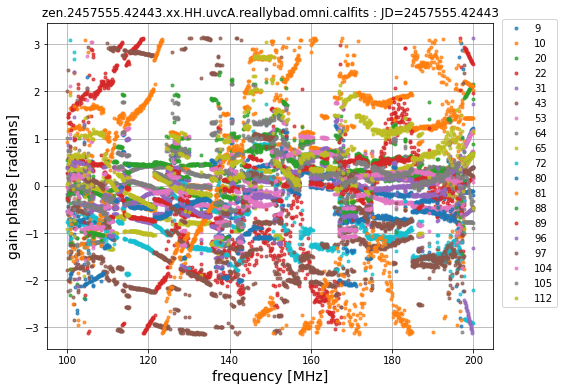

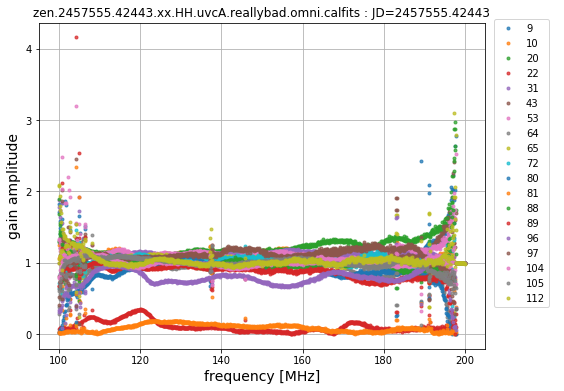

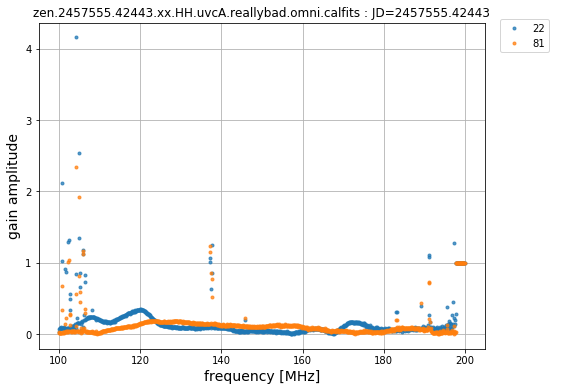

In [3]:
OM.plot_gains(divide_fc=True, plot_type='phs', time_index=0)
OM.plot_gains(plot_type='amp', time_index=0)
OM.plot_gains(ants=[22, 81], plot_type='amp', time_index=0)

### Look at Omnical chi-square output

Antenna 81 stands out and antenna 22 also marginally stands out.

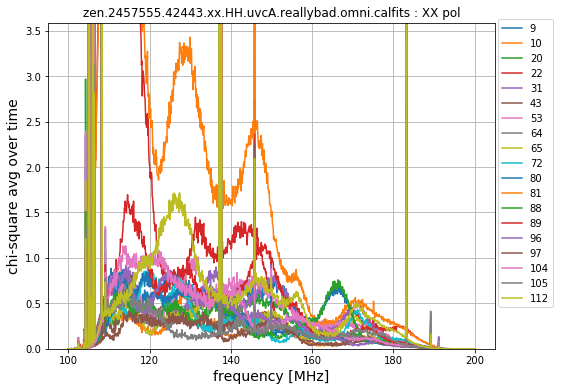

In [4]:
# Look at Chi Square from OmniCal
OM.plot_chisq_tavg()

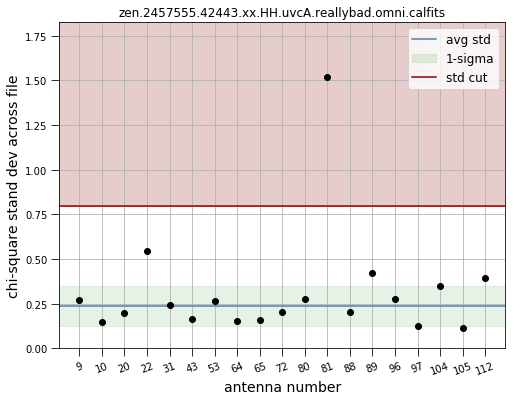

In [5]:
# Look at Chi Square Standard Deviations
OM.plot_chisq_metric()

### Look at phase metrics

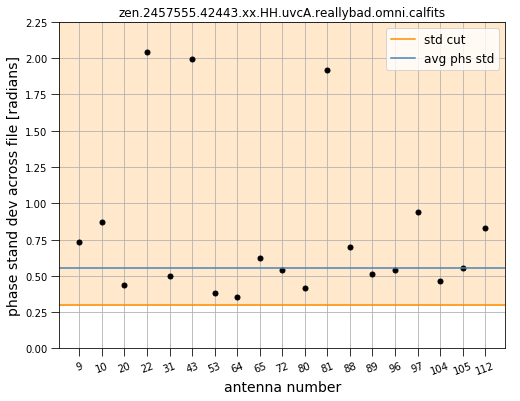

In [6]:
OM.plot_phs_metric(plot_type='std')

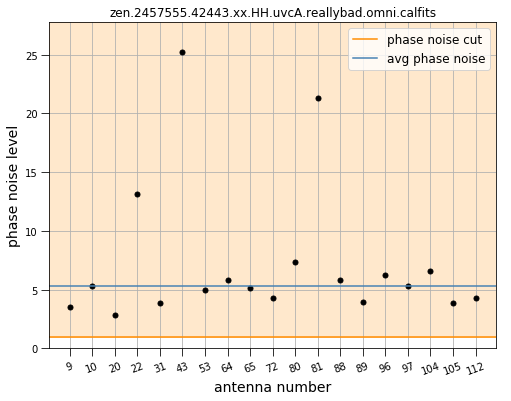

In [7]:
OM.plot_phs_metric(plot_type='ft')

### Look at metric determinations

In [8]:
print OM.metrics['phs_noise_good_sol']
print OM.metrics['phs_std_good_sol']

False
False


## Load a bad *.omni.calfits file

In [9]:
omni_file = os.path.join(DATA_PATH, "zen.2457555.42443.xx.HH.uvcA.bad.omni.calfits")
fc_file = os.path.join(DATA_PATH, "zen.2457555.42443.xx.HH.uvcA.first.calfits")

OM = hqm.omnical_metrics.OmniCal_Metrics(omni_file)
OM.run_metrics(firstcal_file=fc_file, cut_band=True, phs_noise_cut=1.0, phs_std_cut=0.3, chisq_std_cut=5.0)

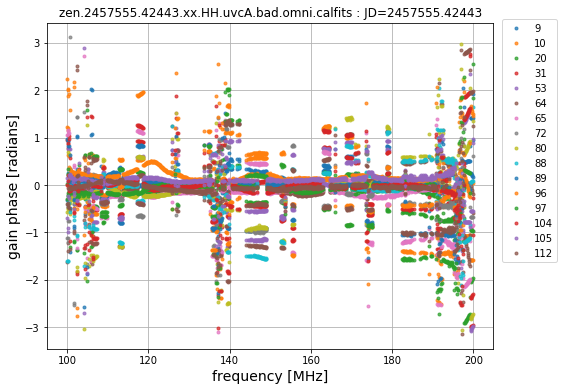

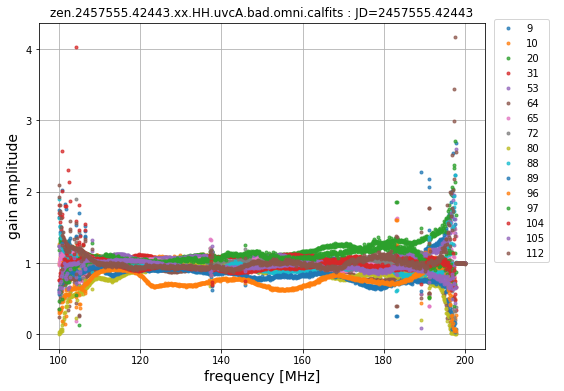

In [10]:
OM.plot_gains(divide_fc=True, plot_type='phs', time_index=0)
OM.plot_gains(plot_type='amp', time_index=0)

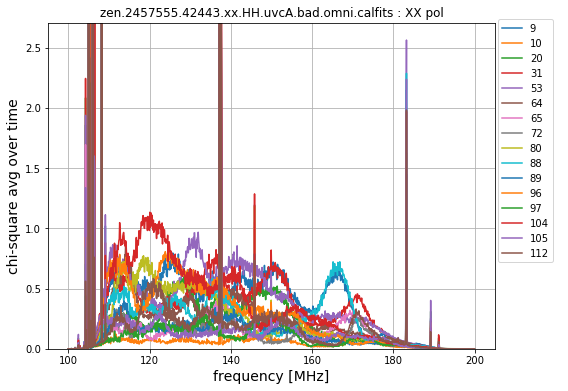

In [11]:
# Look at Chi Square from OmniCal
OM.plot_chisq_tavg()

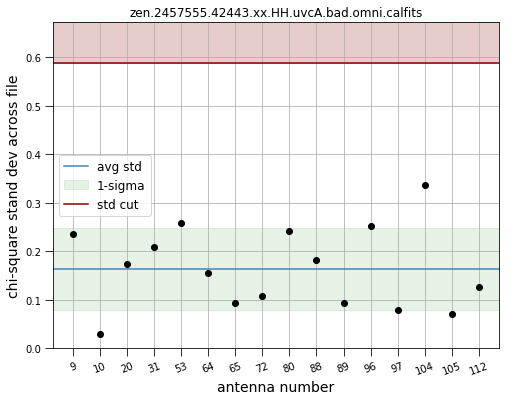

In [12]:
# Look at Chi Square Standard Deviations
OM.plot_chisq_metric()

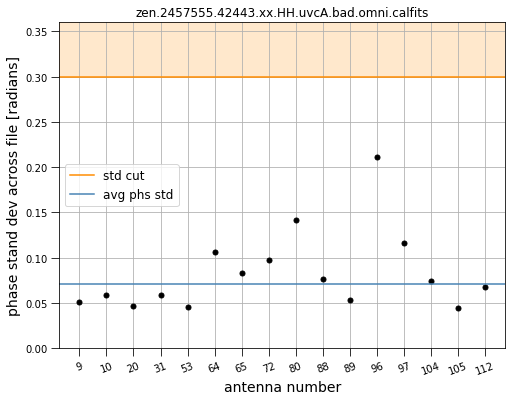

In [13]:
OM.plot_phs_metric(plot_type='std')

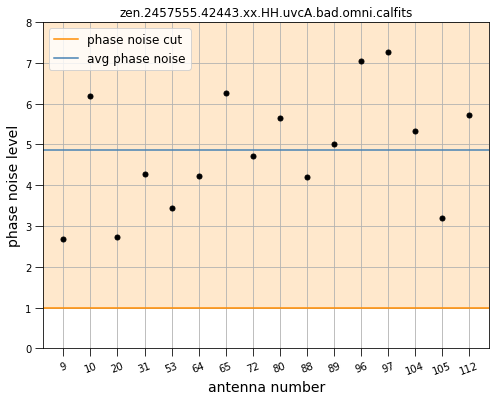

In [14]:
OM.plot_phs_metric(plot_type='ft')

### Look at metric determinations

In [15]:
print OM.metrics['phs_noise_good_sol']
print OM.metrics['phs_std_good_sol']

False
True


## Look at good *.omni.calfits solution

In [16]:
omni_file = os.path.join(DATA_PATH, "zen.2457555.42443.xx.HH.uvcA.good.omni.calfits")
fc_file = os.path.join(DATA_PATH, "zen.2457555.42443.xx.HH.uvcA.first.calfits")

OM = hqm.omnical_metrics.OmniCal_Metrics(omni_file)
OM.run_metrics(firstcal_file=fc_file, cut_band=True, phs_noise_cut=1.0, phs_std_cut=0.3, chisq_std_cut=5.0)

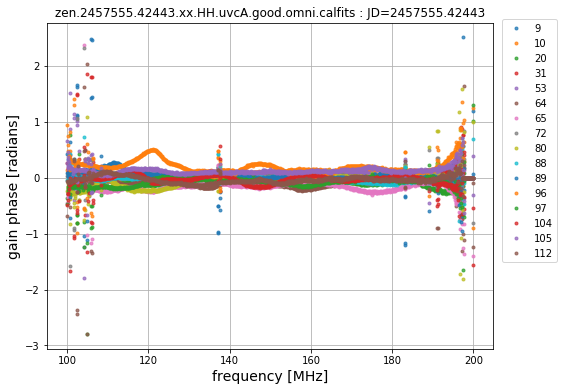

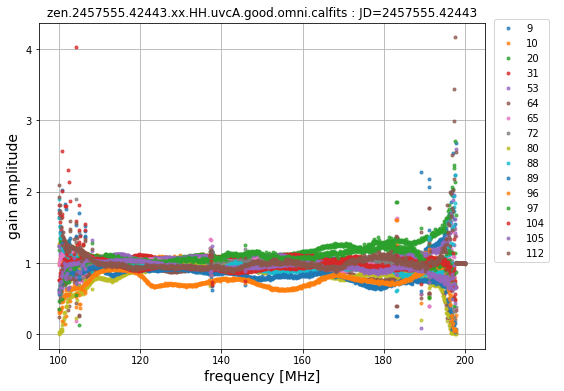

In [17]:
OM.plot_gains(divide_fc=True, plot_type='phs', time_index=0)
OM.plot_gains(plot_type='amp', time_index=0)

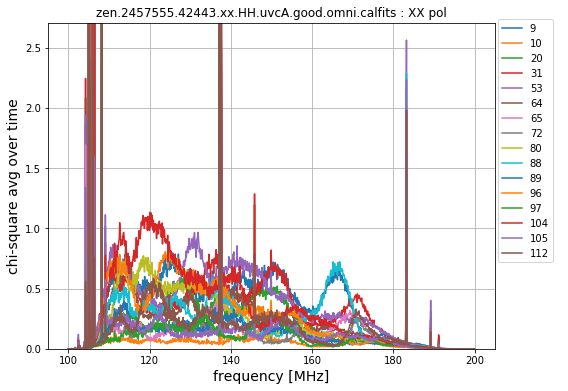

In [18]:
# Look at Chi Square from OmniCal
OM.plot_chisq_tavg()

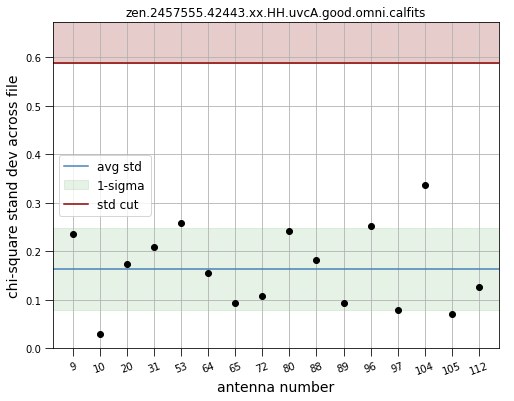

In [19]:
# Look at Chi Square Standard Deviations
OM.plot_chisq_metric(plot_type='std')

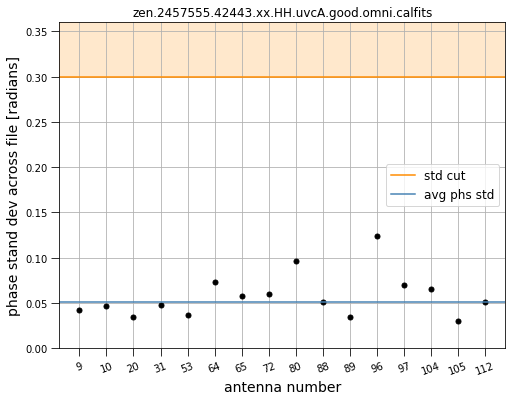

In [20]:
OM.plot_phs_metric(plot_type='std')

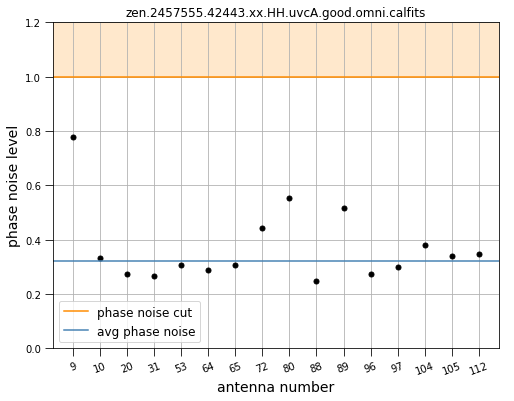

In [21]:
OM.plot_phs_metric(plot_type='ft')

### Look at metric determinations

In [22]:
print OM.metrics['phs_noise_good_sol']
print OM.metrics['phs_std_good_sol']

True
True


## Extra Features

You can further customize the plotting by creating your own `figure` and `axis` object and feeding the `axis` to the plotting routine.

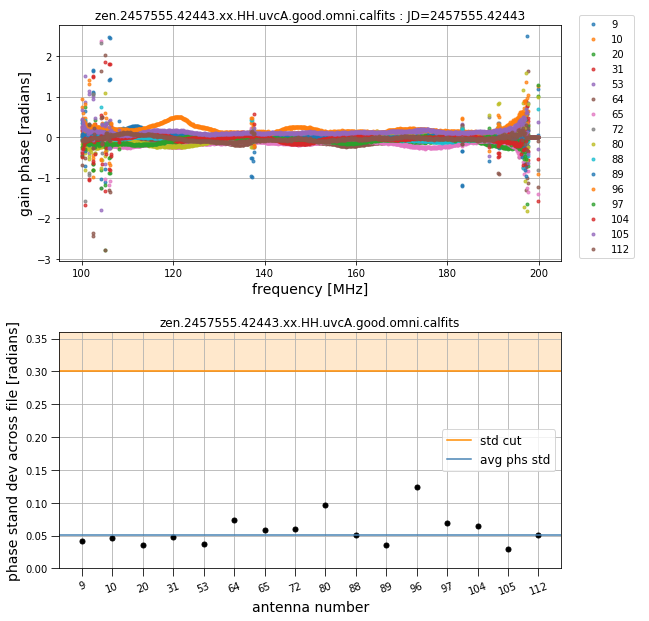

In [23]:
fig, axes = plt.subplots(2, 1, figsize=(9,10))
fig.subplots_adjust(hspace=0.3)

OM.plot_gains(ax=axes[0], divide_fc=True)
OM.plot_phs_metric(ax=axes[1], plot_type='std')